# Solving ODEs with rk2 and rk4

During lab 5, we looked at approaches we can use to solve ODEs. Two methods we used were RK2 and RK4. 

In [39]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [40]:
def rk2(f,t,h,g):
    k1 = h*g(t,f)
    k2 = h*g(t+h/2,f+k1/2)
    return f + k2

In [41]:
def rk4(f,t,h,g):
    k1 = h*g(t,f)
    k2 = h*g(t+0.5*h, f+0.5*k1)
    k3 = h*g(t+0.5*h, f+0.5*k2)
    k4 = h*g(t+h, f+k3)
    
    return f+ k1/6. + k2/3. + k3/3. + k4/6.

Let's go over a quick refresher in how to use our RK2 and RK4 methods by reviewing a simple harmonic oscillator:

In [42]:
def sho(t,f):
    """simple harmonic oscillator has
    
    F = -k*x
    
    recall that for a Newton's second law system, we have
    
    df_vec/dt = RHS:
    
    df_vec[0]/dt = v
    df_vec[1]/dt = F
    
    where f[0] is the position x
          f[1] is the velocity v
    """
    k = 1.
    m = 0.1
    
    x = f[0]
    v = f[1]
    RHS = np.array([v,-k*x/m])
    
    return RHS

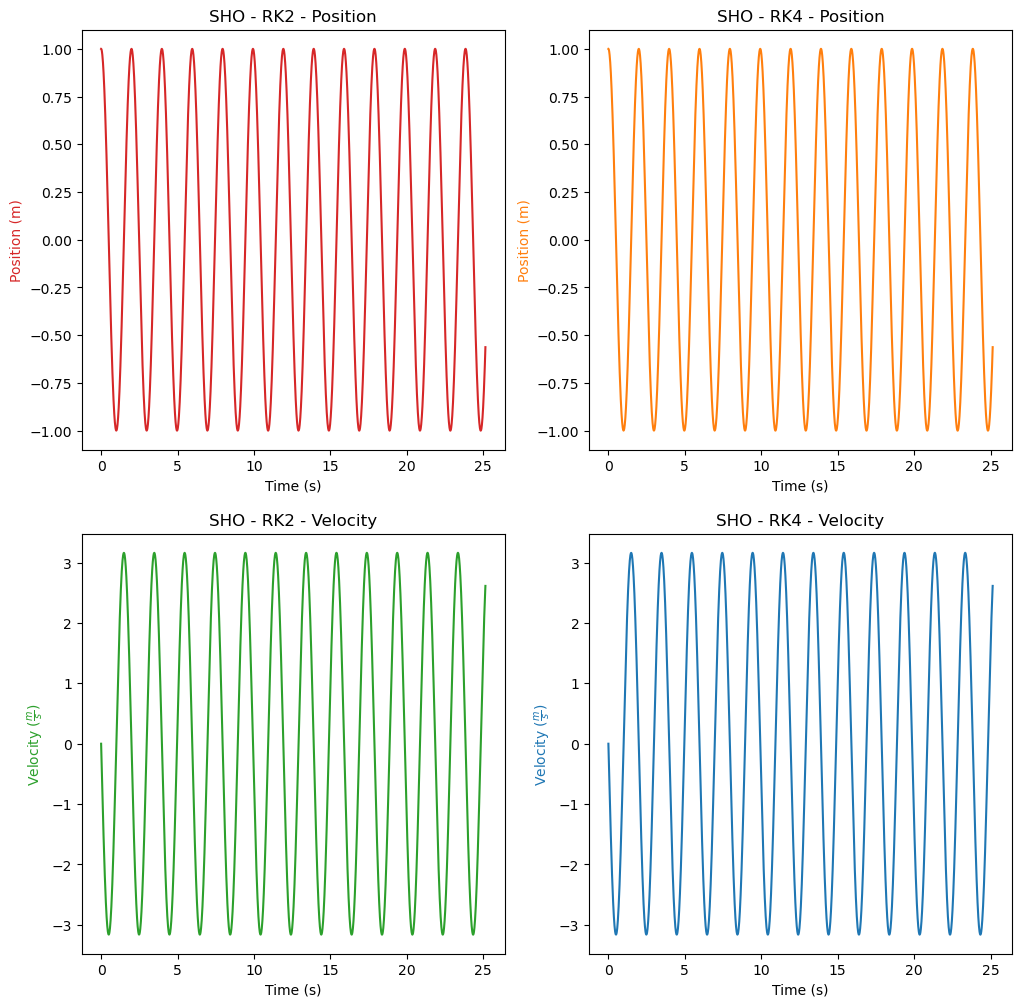

In [43]:
# initial conditions:
x0 = np.array([1., 0.]) # spring is at x = 1, with no initial velocity.
t0 = 0. # start at t= 0

t_stop = 8*np.pi
x_2 = [x0[0],]
v_2 = [x0[1],]
x_4 = [x0[0],]
v_4 = [x0[1],]
t = [t0,]
xold_2 = x0 # array for old rk2 values
xold_4 = x0 # array for old rk4 values
h=0.01      # modify this if desired
while t[-1] < t_stop:
    xold_2 = rk2(xold_2,t[-1],h,sho)
    xold_4 = rk4(xold_4,t[-1],h,sho)
    x_2.append(xold_2[0])
    v_2.append(xold_2[1])
    x_4.append(xold_2[0])
    v_4.append(xold_2[1])
    t.append(t[-1]+h)
    

# Create figures
fig, axs = plt.subplots(2, 2, figsize=(12,12))
 
color = 'tab:red'
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Position (m)', color = color)
axs[0,0].plot(t, x_2, color = color)
axs[0,0].set_title("SHO - RK2 - Position")

color = 'tab:orange'
axs[0,1].set_xlabel('Time (s)')
axs[0,1].set_ylabel('Position (m)', color = color)
axs[0,1].plot(t, x_4, color = color)
axs[0,1].set_title("SHO - RK4 - Position")
 
color = 'tab:green'
axs[1,0].set_xlabel('Time (s)')
axs[1,0].set_ylabel(r'Velocity ($\frac{m}{s}$)', color = color)
axs[1,0].plot(t, v_2, color = color)
axs[1,0].set_title("SHO - RK2 - Velocity")

color = 'tab:blue'
axs[1,1].set_xlabel('Time (s)')
axs[1,1].set_ylabel(r'Velocity ($\frac{m}{s}$)', color = color)
axs[1,1].plot(t, v_4, color = color)
axs[1,1].set_title("SHO - RK4 - Velocity")
 
# Show plot
plt.show() 

# ODE Solver with Scipy 

Unsurprisingly, the Scipy Library has built in ODE solvers we can call upon to assist us in solving ODEs.  

The function we will use today can be loaded into our workbook using the following code:

In [44]:
from scipy.integrate import odeint

Again, it is worth reading about the function on the [scipy website](https://docs.scipy.org/doc/scipy/tutorial/integrate.html). 

The ODE solver is easy to implement. Let's solve the SHO using scipy. 

In [45]:
# we want to use the same constant as before, 
# but we need to specify them here since the values were previously 
# set inside the SHO function

k = 1   # spring constant
m = 0.1 # mass in kg

t_stop = 8*np.pi

def SHO(u,t): #defines the system of diff. eq.
    x, v = u    # this is the equivalent of f above
    return (v, -k/m*x)  # this is the equivalent of RHS above

# time array containing all of the time values we want to evaluate our SHO for
t = np.arange(0,t_stop+0.1,0.1)

# initial values of x, v
u0 = np.array([1.0, 0]) 

#solve ODE, columns contain x, v, and m info
u=odeint(SHO,u0,t) 

Text(0.5, 1.0, 'SHO - Scipy - Velocity')

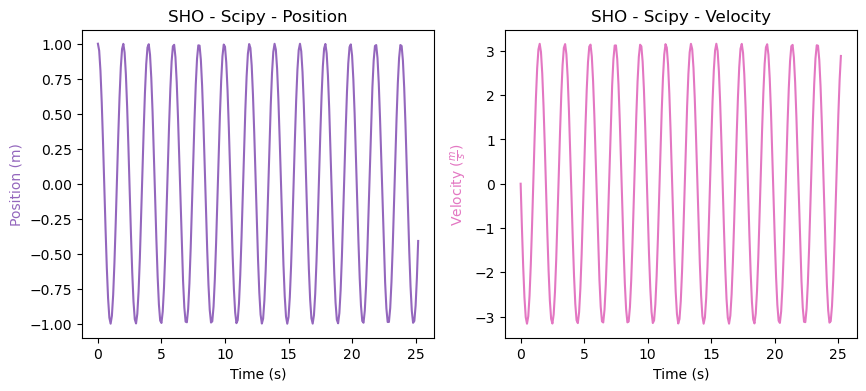

In [46]:
# Create figures
fig, axs = plt.subplots(1, 2, figsize=(10,4))
 
color = 'tab:purple'
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Position (m)', color = color)
axs[0].plot(t, u[:,0], color = color)
axs[0].set_title("SHO - Scipy - Position")

color = 'tab:pink'
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel(r'Velocity ($\frac{m}{s}$)', color = color)
axs[1].plot(t, u[:,1], color = color)
axs[1].set_title("SHO - Scipy - Velocity")

Great, now that we've applied our rk2, rk4, and scipy ODE solvers, let's test it out on something a bit more interesting... 

# **Vertical Ascent with Gravity and Air Resistance**

Starting with our general rocket equation:

$$\sum_iF_i = m\frac{dV}{dt} + \nu_e\frac{dm}{dt}$$

We now want to consider how our equations will evolve if we were to take off from the surface of a planet including the effect of air resistance and changing gravity. 

Using Newton's gravitational equation:

$$F_G = G\frac{mM}{({r+z})^2}$$

If our rocket is leaving from the surface of the planet, then:

$$mg = G\frac{mM}{({r+z})^2}$$

$$g(\frac{r}{r+z})^2 = \frac{GM}{({r+z})^2}$$

where $g$ is the gravitational acceleration at the surface of the planet, $r$ is the radius of the planet, and $z$ is the height of our rocket. 

Now, the equation for drag (or air resistance):

$$F_D = \frac{1}{2}\rho_{air} V^2 C_d A$$

where $C_d$ is the drag coefficient (for our rocket, we can use 0.2), and $A$ is the cross-sectional area of the rocket. 

We can also include the fact that the density of air $\rho_{air}$ decreases with height following:

$$\rho = \rho_{0} e^{-\frac{z}{H}}$$ 

where $z$ is the height (in m) and $H$ is the scale height = 8500 m. 

*Note: this equation is a good approximation, but does assume temperature independence as well as constant water vapor, but it'll work fine for us here*

Combining all of the above information gives: 

$$-g(\frac{r}{r+z})^2 - \frac{1}{2}V^2 C_d A\rho_{0} e^{-\frac{z}{H}}  = m\frac{dV}{dt} + \nu_e\frac{dm}{dt}$$

which can be rearranged to solve for the acceleration of the rocket, $\frac{dV}{dt}$:

$$\frac{dV}{dt} = \frac{\nu_e \beta}{m} - g(\frac{r}{r+z})^2 - \frac{V^2 C_d A\rho_{0} e^{-\frac{z}{H}}}{2m}$$

## Solving our Modified Rocket Equation

We can solve this modified rocket equation by arranging it as a system of equations that we can then solve using our ODE solvers. 

Our rocket equation is really 3 coupled differential equations: 

$$\begin{equation*}
\begin{bmatrix}
\frac{dx}{dt}\\
\frac{dv}{dt} \\
\frac{dm}{dt}
\end{bmatrix} = 
\begin{bmatrix}
v\\
\frac{\nu_e \beta}{m} - g(\frac{r}{r+z})^2 - \frac{V^2 C_d A\rho_{0} e^{-\frac{z}{H}}}{2m}\\
-\beta
\end{bmatrix}
\end{equation*}$$

Written in this form, we can now utilize our ODE solvers. 

Below are given conditions for our rocket (burn rate, starting mass, final mass, etc.)


In [47]:
# Given information for our modified rocket equation

v_e = 4000 # exhaust velocity m/s
t_b = 100 # seconds to total fuel burn
m_0 = 100000 # initial mass of ship
m_f = 0.1*m_0 # final mass of the ship after fuel burn
b = (m_0 - m_f)/t_b # fuel burn rate in kg/s
g = 9.8 # gravitational acceleration m/s^2
C_d = 0.2 # drag coefficient 
rho_0 = 1.2 # density of air at sea-level
r_s = 0.2   # radius of the ship 
r_E = 6371000 # radius of the Earth in m
A = math.pi*(r_s**2) # cross sectional area of the ship 
K2 = C_d*rho_0*A / 2  # calc of constants in drag equation
H = 8500 # scale height for atmospheric pressure, in m

Use one (or both) of our RK methods to solve for the position, velocity, and mass in time for our rocket. 

Make a plot of the rockets position and velocity vs time. 

If you have time, compare this modifed rocket equation to our last rocket equation (or you can simply emit the modifying terms here). How does gravitational dependence and air resistance impact the final velocity and distance traveled? 

Does the rocket reach escape velocity?

In [48]:
def rocket(t,f):
    """rocket equation
    
    F = -k*x
    
    recall that for a Newton's second law system, we have
    
    df_vec/dt = RHS:
    
    df_vec[0]/dt = v
    df_vec[1]/dt = F/m
    df_vec[2]/dt = -beta
    
    where f[0] is the position z
          f[1] is the velocity v
          f[2] is the mass m
    """
    k = 1.
    m = 0.1
    
    z = f[0]
    v = f[1]
    m = f[2]
    RHS = np.array([v, v_e*b/m - g*(r_E/(r_E+z))**2 - v**2*K2*np.exp(-z/H)/m ,-b])
    
    return RHS

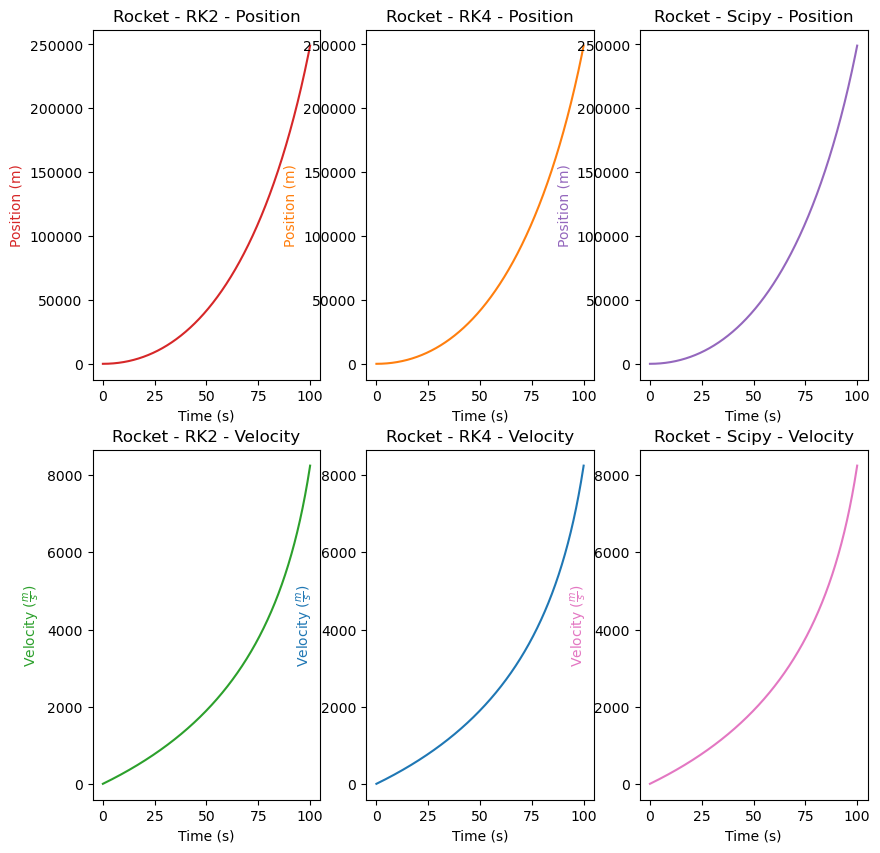

In [58]:
# initial and final conditions
t0 = 0. # start at t= 0
x0 = np.array([0., 0.,m_0])
t_stop = 100 # when all the fuel is burned MAYBE CHANGE

#rk solvers
x_2 = [x0[0],]
v_2 = [x0[1],]
x_4 = [x0[0],]
v_4 = [x0[1],]
t = [t0,]
xold_2 = x0 # array for old rk2 values
xold_4 = x0 # array for old rk4 values
h=0.001      # CAN MODIFY
while t[-1] < t_stop:
    xold_2 = rk2(xold_2,t[-1],h,rocket)
    xold_4 = rk4(xold_4,t[-1],h,rocket)
    x_2.append(xold_2[0])
    v_2.append(xold_2[1])
    x_4.append(xold_2[0])
    v_4.append(xold_2[1])
    t.append(t[-1]+h)

# using scipy
def ROCKET(u,t): #defines the system of diff. eq.
    z, v, m = u    # this is the equivalent of f above
    return (v, v_e*b/m - g*(r_E/(r_E+z))**2 - v**2*K2*np.exp(-z/H)/m ,-b)  # this is the equivalent of RHS above

# time array containing all of the time values we want to evaluate our SHO for
t_ = np.arange(0,t_stop+0.001,0.001)# jump should be same size as h

# initial values of x, v
u0 = np.array([0, 0, m_0]) 

#solve ODE, columns contain x, v, and m info
u=odeint(ROCKET,u0,t) 

# Create figures
fig, axs = plt.subplots(2, 3, figsize=(10,10))
 
color = 'tab:red'
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Position (m)', color = color)
axs[0,0].plot(t, x_2, color = color)
axs[0,0].set_title("Rocket - RK2 - Position")

color = 'tab:orange'
axs[0,1].set_xlabel('Time (s)')
axs[0,1].set_ylabel('Position (m)', color = color)
axs[0,1].plot(t, x_4, color = color)
axs[0,1].set_title("Rocket - RK4 - Position")
 
color = 'tab:green'
axs[1,0].set_xlabel('Time (s)')
axs[1,0].set_ylabel(r'Velocity ($\frac{m}{s}$)', color = color)
axs[1,0].plot(t, v_2, color = color)
axs[1,0].set_title("Rocket - RK2 - Velocity")

color = 'tab:blue'
axs[1,1].set_xlabel('Time (s)')
axs[1,1].set_ylabel(r'Velocity ($\frac{m}{s}$)', color = color)
axs[1,1].plot(t, v_4, color = color)
axs[1,1].set_title("Rocket - RK4 - Velocity")

color = 'tab:purple'
axs[0,2].set_xlabel('Time (s)')
axs[0,2].set_ylabel('Position (m)', color = color)
axs[0,2].plot(t_, u[:,0], color = color)
axs[0,2].set_title("Rocket - Scipy - Position")
 
color = 'tab:pink'
axs[1,2].set_xlabel('Time (s)')
axs[1,2].set_ylabel(r'Velocity ($\frac{m}{s}$)', color = color)
axs[1,2].plot(t_, u[:,1], color = color)
axs[1,2].set_title("Rocket - Scipy - Velocity")

 
# Show plot
plt.show() 